In [1]:
!pip install imbalanced-learn

In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 



In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf

In [6]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [7]:
import seaborn as sns

In [8]:
df =sm.datasets.fair.load_pandas().data

In [9]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [10]:
#rate_marriage: woman&#39;s rating of her marriage (1 = very poor, 5 = very good)

#yrs_married: number of years married

#children: number of children

#religious: woman&#39;s rating of how religious she is (1 = not religious , 4 =strongly religious)

#educ: level of education (9 = grade school, 12 = high school, 14 =some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)

#occupation: woman&#39;s occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = &quot;white collar&quot;, 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

#affairs: time spent in extra-marital affairs

In [11]:
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [12]:
df['affair']=df['affairs'].round(1)

In [13]:
df.drop('affairs', axis=1, inplace=True)

In [14]:
df["affair"] = np.where(df["affair"] > 0 , 1, 0)


In [15]:
df.groupby('rate_marriage').mean()


,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
rate_marriage,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,0.623563
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,0.543807
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.321588
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.178465


In [16]:
df['affair'].value_counts()

0    4335
1    2031
Name: affair, dtype: int64

<AxesSubplot:>

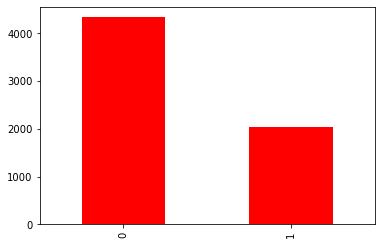

In [17]:
df['affair'].value_counts().plot(kind='bar', color='red')

In [18]:
data=df.groupby('rate_marriage')['affair']

In [19]:
data.size()

rate_marriage
1.0      99
2.0     348
3.0     993
4.0    2242
5.0    2684
Name: affair, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



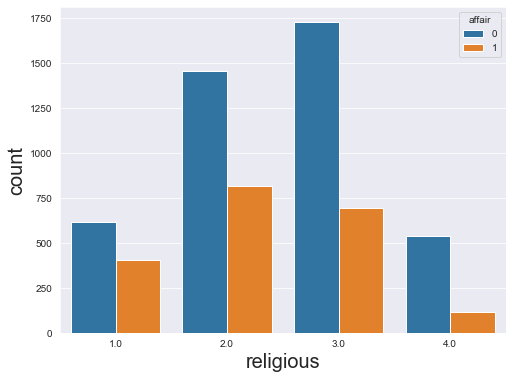

In [20]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("religious",hue="affair",data=df)
plt.xlabel("religious",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

In [21]:
y, x = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', df, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [22]:
x = x.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [23]:
x.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [24]:
y.head()

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [25]:
#we can see the data is imbalanced dataset

In [26]:
from collections import Counter

In [27]:
!pip install imblearn

In [28]:
from imblearn import over_sampling

In [34]:
from imblearn.over_sampling import RandomOverSampler
x_os,y_os = RandomOverSampler().fit_resample(x,y)

In [35]:
x_os.shape

(8670, 17)

In [36]:
y_os.shape

(8670, 1)

# How children affects the husband-wife relationship.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



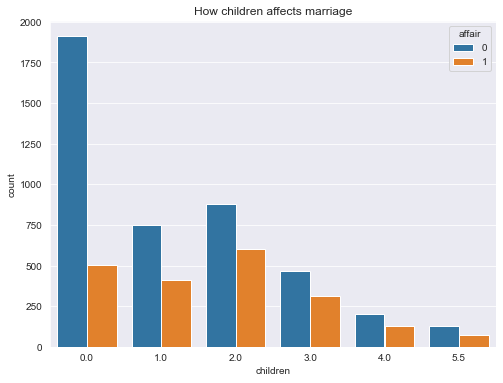

In [37]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("children",data=df,hue="affair")
plt.title("How children affects marriage")
plt.show()

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_os,y_os,test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(6936, 17)
(6936, 1)
(1734, 17)
(1734, 1)


In [41]:
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_predicted=clf.predict(x_test)
y_train_predicted=clf.predict(x_train)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,classification_report
print("train set accuracy score: ",accuracy_score(y_train,y_train_predicted))
print("test set accuracy score :",  accuracy_score(y_test,y_predicted))

train set accuracy score:  0.6854094579008074
test set accuracy score : 0.6701268742791234


In [44]:
y_predicted=clf.predict(x_test)
print(confusion_matrix(y_test,y_predicted))
print(accuracy_score(y_test,y_predicted))

[[609 300]
 [272 553]]
0.6701268742791234


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68       909
         1.0       0.65      0.67      0.66       825

    accuracy                           0.67      1734
   macro avg       0.67      0.67      0.67      1734
weighted avg       0.67      0.67      0.67      1734



In [51]:
pred_probab=clf.predict_proba(x_test)
pred_probab

array([[0.34419894, 0.65580106],
       [0.6917964 , 0.3082036 ],
       [0.64469949, 0.35530051],
       ...,
       [0.37616975, 0.62383025],
       [0.30536383, 0.69463617],
       [0.33691096, 0.66308904]])

In [47]:
print("Prediction chance of your model :")
print(clf.predict_proba(np.array([[0,0,0,0,0,1,1,0,0,0,0,4,32,5,2,3,17]]))*100)

Prediction chance of your model :
[[91.45854236  8.54145764]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

